# Importing the required Libraries  

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle 
import cv2
import os

In [5]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

# Load and Preprocess data


In [7]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("dataset/"))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
print("[INFO] loading complete")

[INFO] loading images...
[INFO] loading complete


# Data Encoding, Train/Test split and Data Augmentation

In [8]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

In [9]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

# Applied Data Augmentation Preview

In [10]:
os.mkdir('preview')
x = trainX[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in trainAug.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

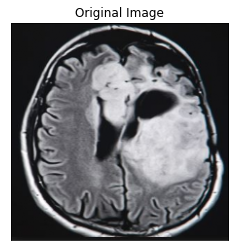

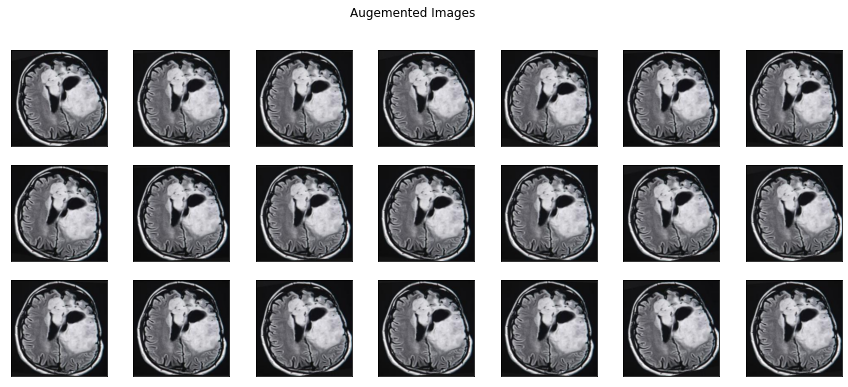

In [12]:
plt.imshow(trainX[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [13]:
#The rm command has a powerful option, -R (or -r ), otherwise known as the recursive option. When you run the rm -R command 
#on a folder, you're telling Terminal to delete that folder, any files it contains, any sub-folders it contains, 
#and any files or folders in those sub-folders, all the way down.
#!rm -rf preview/  # Uncomment '#!rm -rf preview/' to delete preview folder

# Data Sample View

In [15]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Brain: {}'.format(labels_dict[index]))
        plt.show()

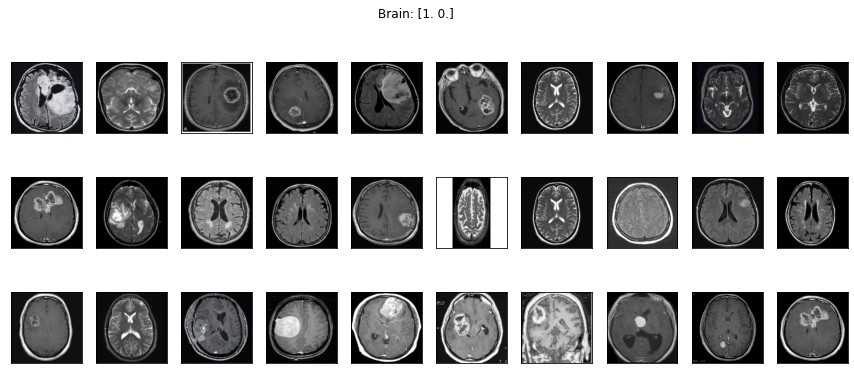

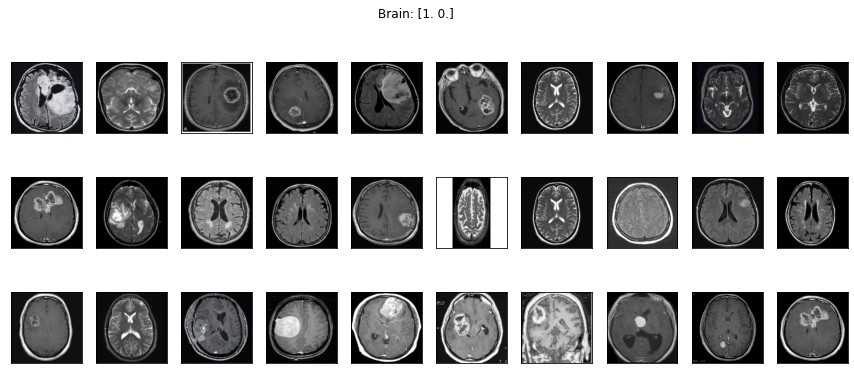

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [16]:
plot_samples(trainX, trainY,labels, 30)

# Fine-tuning and Model Build

In [17]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 81s 1us/step


# Compile and fit Model

In [18]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)
print("[INFO] training complete.")

[INFO] compiling model...


C:\Users\golla\anaconda3\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\golla\AppData\Local\Temp/ipykernel_29476/3465542586.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


[INFO] training head...
Epoch 1/25
24/24 [==============================] - 32s 1s/step - loss: 0.6882 - accuracy: 0.6117 - val_loss: 0.6357 - val_accuracy: 0.6122
Epoch 2/25
24/24 [==============================] - 32s 1s/step - loss: 0.6248 - accuracy: 0.6170 - val_loss: 0.5993 - val_accuracy: 0.6735
Epoch 3/25
24/24 [==============================] - 35s 1s/step - loss: 0.5910 - accuracy: 0.6862 - val_loss: 0.5839 - val_accuracy: 0.7755
Epoch 4/25
24/24 [==============================] - 33s 1s/step - loss: 0.5789 - accuracy: 0.7128 - val_loss: 0.5690 - val_accuracy: 0.7959
Epoch 5/25
24/24 [==============================] - 34s 1s/step - loss: 0.5407 - accuracy: 0.7708 - val_loss: 0.5510 - val_accuracy: 0.7755
Epoch 6/25
24/24 [==============================] - 34s 1s/step - loss: 0.5392 - accuracy: 0.7760 - val_loss: 0.5391 - val_accuracy: 0.7755
Epoch 7/25
24/24 [==============================] - 34s 1s/step - loss: 0.5035 - accuracy: 0.7713 - val_loss: 0.5263 - val_accuracy: 0.7

# Model Evaluate

In [19]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

[INFO] evaluating network...
7/7 [==============================] - 8s 887ms/step
                precision    recall  f1-score   support

dataset/Normal       0.67      0.63      0.65        19
 dataset/Tumor       0.77      0.80      0.79        30

      accuracy                           0.73        49
     macro avg       0.72      0.72      0.72        49
  weighted avg       0.73      0.73      0.73        49



# Confusion Matrix for Statistical Evaluation

In [20]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs) # use axis = 0 in the next model 
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) # Switch sensitivity and specificity 
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) # In the calculations
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[12  7]
 [ 6 24]]
acc: 0.7347
sensitivity: 0.6316
specificity: 0.8000


# Model Plot

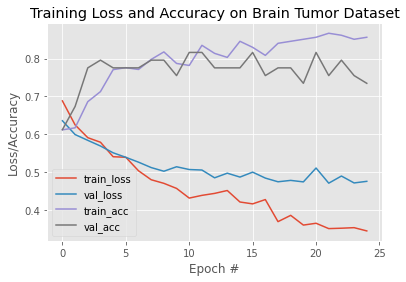

In [22]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Brain Tumor Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("BrainTumor.png")

# Model Save

In [23]:
# serialize the model to disk
print("[INFO] saving Brain Tumor detector model...")
model.save('BrainTumor', save_format="h5")

[INFO] saving Brain Tumor detector model...


In [24]:
# serialize the label binarizer to disk
print("[INFO] serializing labels...")
f = open('lb.BTpickle', "wb")
f.write(pickle.dumps(lb))
f.close()
print("[INFO] serialization complete.")

[INFO] serializing labels...
[INFO] serialization complete.


# Crop Brain out of the images (Example)

In [29]:
import imutils
IMG_SIZE = (224,224)
img = cv2.imread('C:\\Users\\golla\\Study\\Projects\\Brain Tumer Detection\\dataset\\Tumor\\Y1.jpg')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS].copy()

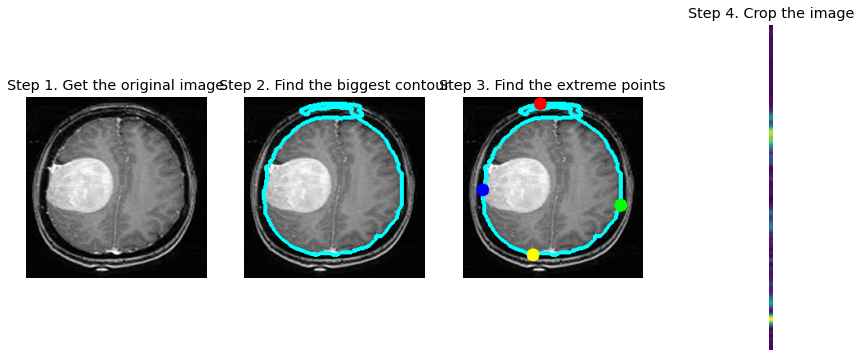

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()